In [28]:
import pandas as pd

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('final_completed_merged_data.csv')

# Define the columns that you want to consider for duplicates
columns_to_check = ['Label', 'Month', 'Year', 'Loan Rate', 'Election', 'Close (Rs.)', 'Inflation', 'Buy Rate']

# Remove duplicates based on the specified columns
df_no_duplicates = df.drop_duplicates(subset=columns_to_check)


df_no_duplicates 
# Group the data by "Label," "Year," and "Month" columns and count the occurrences
#grouped = df_no_duplicates.groupby(['Label']).size().reset_index(name='Count')
#grouped

# Filter the DataFrame to include only rows where Count is greater than 1
#filtered_grouped = grouped[grouped['Count'] > 1]
#filtered_grouped


,Label,Year,Month,Loan Rate,Election,Close (Rs.),Inflation,Buy Rate
0,SUN.N0000,1990,3,18.7,0,12.500000,22.3,40.0200
1,GREG.N0000,1990,4,18.7,0,0.500000,22.6,40.0200
2,SELI.N0000,1991,1,19.3,0,550.000000,15.4,40.4000
3,SHAL.N0000,1991,2,19.3,0,575.000000,13.7,40.7200
4,KZOO.N0000,1991,4,19.3,0,125.000000,14.0,40.9400
...,...,...,...,...,...,...,...,...
41869,VPEL.N0000,2023,9,12.0,0,6.926316,1.3,317.5436
41870,WAPO.N0000,2023,9,12.0,0,35.342105,1.3,317.5436
41871,WATA.N0000,2023,9,12.0,0,75.357895,1.3,317.5436
41872,WIND.N0000,2023,9,12.0,0,18.768421,1.3,317.5436


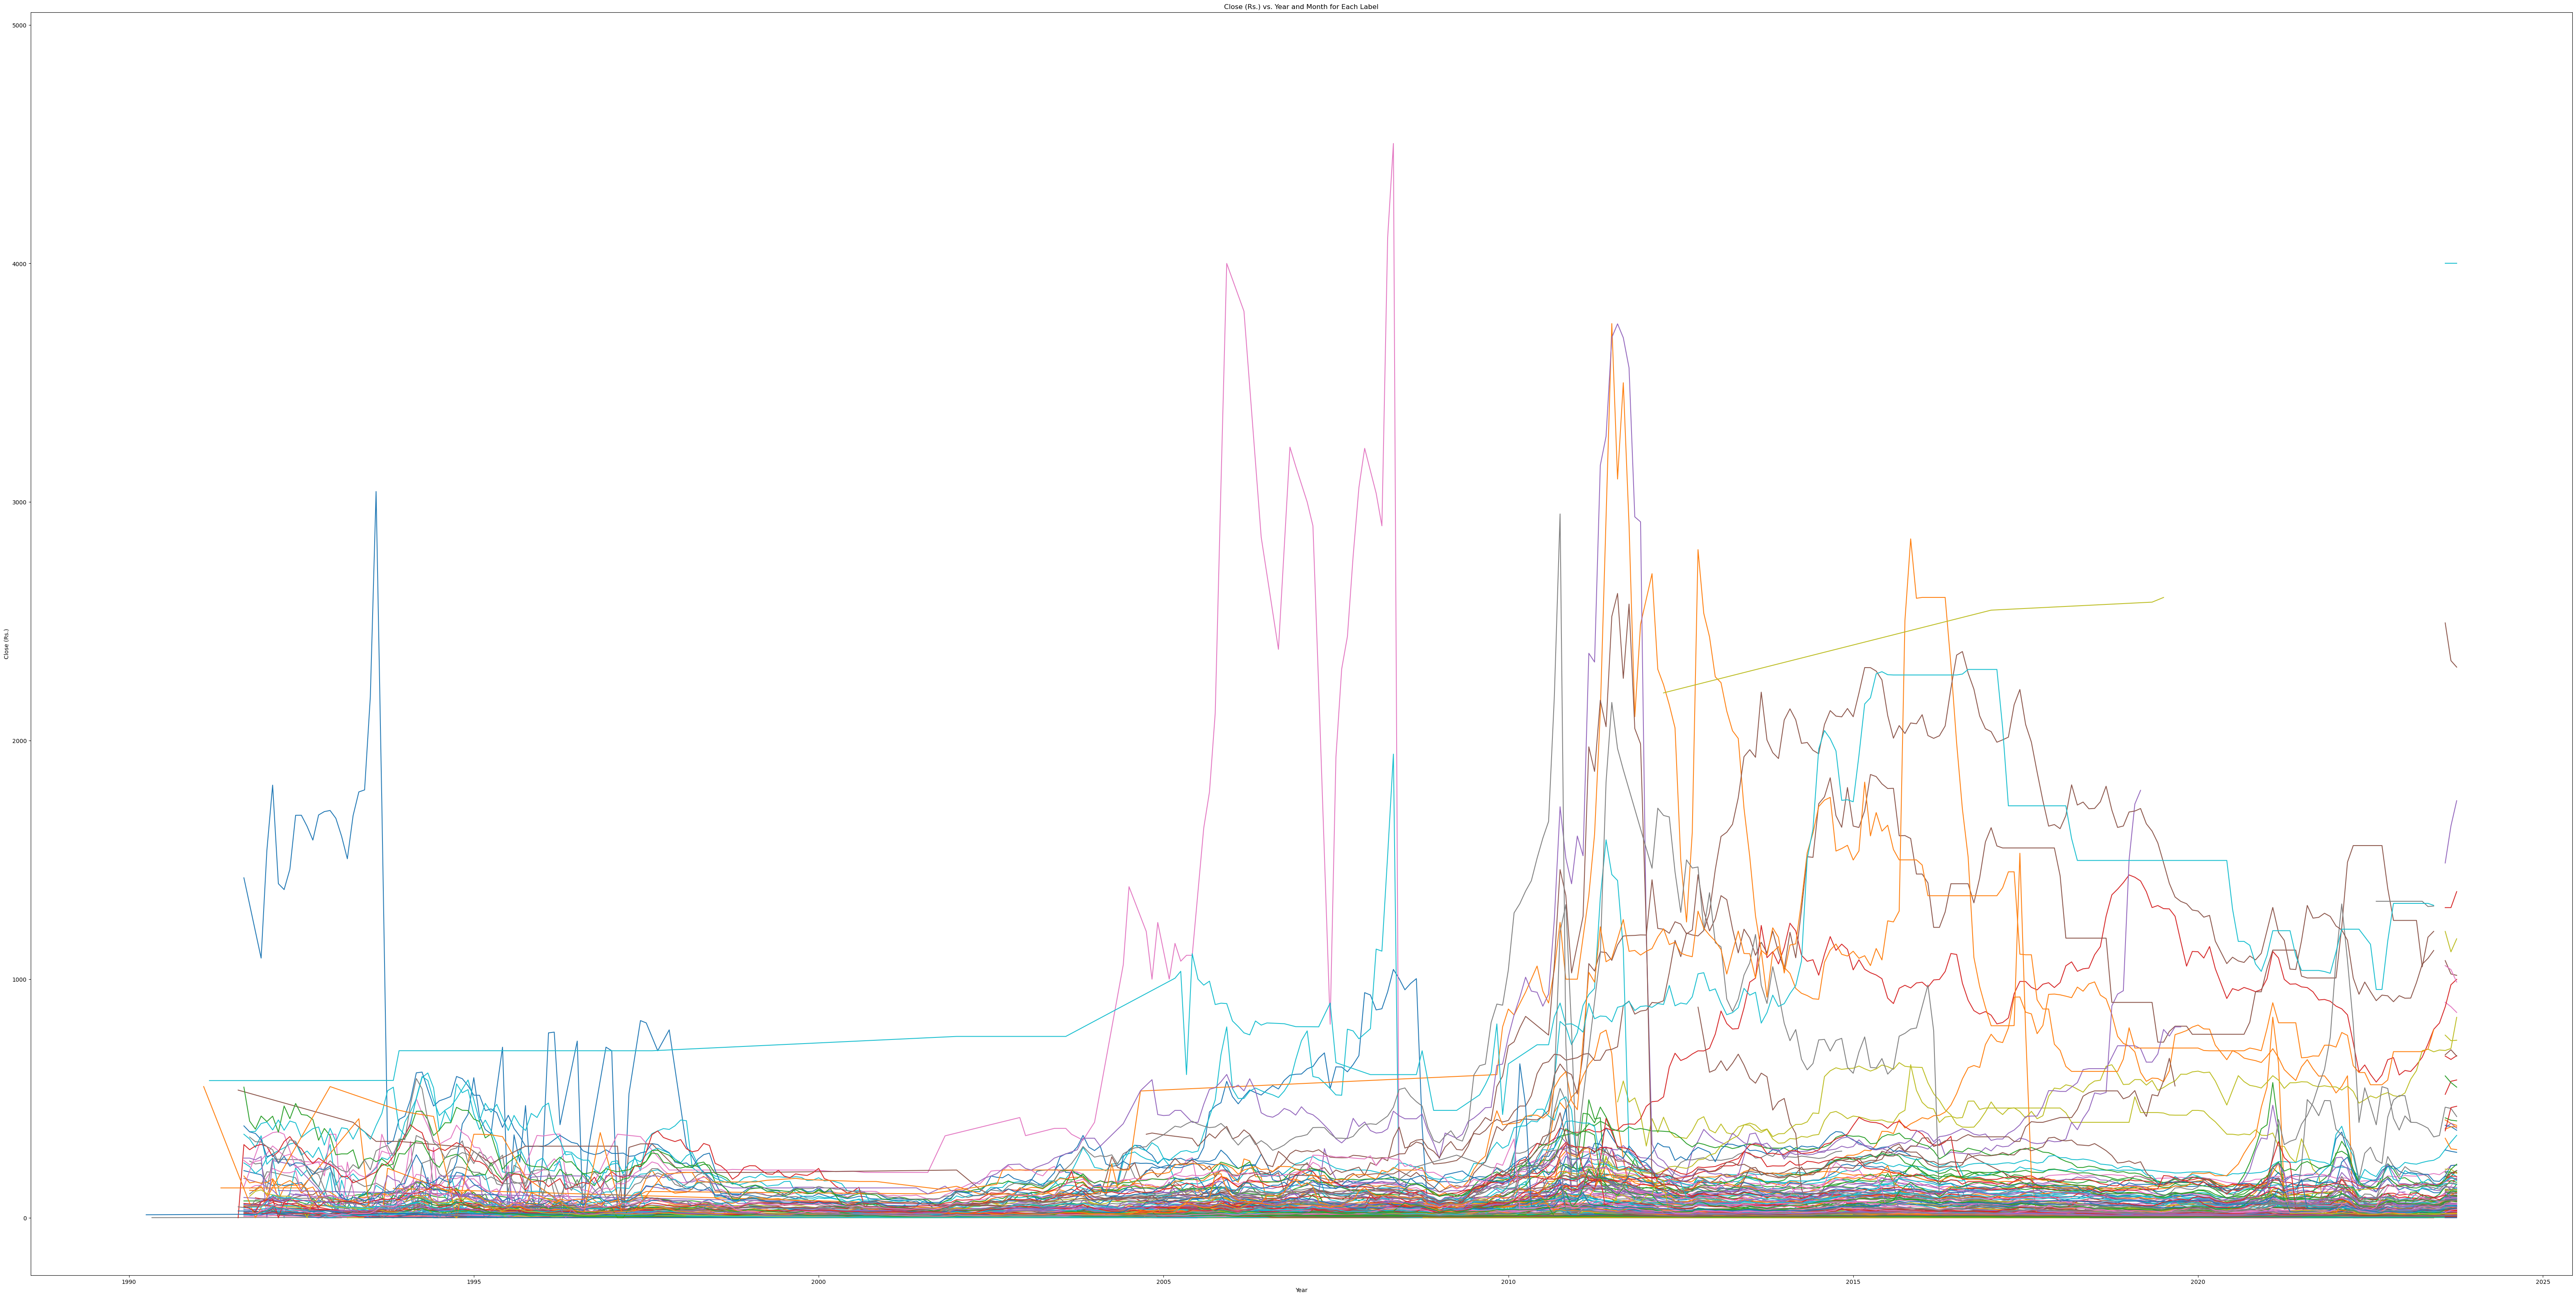

In [36]:
import matplotlib.pyplot as plt
import pandas as pd


# Group the data by 'Label' to plot each label separately
grouped = df_no_duplicates.groupby('Label')

# Initialize the plot
plt.figure(figsize=(80, 40))

# Iterate over each group (label) and plot the data
for label, group_data in grouped:
    plt.plot(group_data['Year'] + group_data['Month'] / 12, group_data['Close (Rs.)'], label=label)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Close (Rs.)')
plt.title('Close (Rs.) vs. Year and Month for Each Label')

# Show the plot
plt.show()

In [34]:
# Create a list of all labels in the dataset
all_labels = df_no_duplicates['Label'].unique()

# Create a reference list of all possible combinations of labels and months
all_months = [i for i in range(1, 13)]  # Months 1 to 12
all_years = [i for i in range(2000, 2021)]  # Years 2000 to 2020
label_month_combinations = [(label, month, year) for label in all_labels for month in all_months for year in all_years]

# Group the dataset by 'Label' and count the number of rows for each label
label_counts = df_no_duplicates.groupby('Label').size()

# Find labels that do not have 251 rows (i.e., missing records)
completed_labels = [label for label in all_labels if label_counts.get(label, 0) > 350]

# Create a DataFrame for the missing labels
completed_labels_df = pd.DataFrame({'Label': completed_labels})

print("Full Labels DataFrame:")
print(completed_labels_df)

Full Labels DataFrame:
         Label
0    JKH.N0000
1   BRWN.N0000
2   CARG.N0000
3   CFIN.N0000
4   CFLB.N0000
5   CIND.N0000
6   COMB.N0000
7    CTC.N0000
8   DFCC.N0000
9   DIPD.N0000
10  EAST.N0000
11  GHLL.N0000
12  HAYC.N0000
13  HAYL.N0000
14   LMF.N0000
15  OSEA.N0000
16   PDL.N0000
17  RICH.N0000
18  SAMP.N0000
19  SEYB.N0000
20  SHOT.N0000
21  TILE.N0000
22   ACL.N0000
23  ASIR.N0000
24   CIC.N0000
25  CINV.N0000
26  GRAN.N0000
27   HNB.N0000
28  NEST.N0000
29  ONAL.N0000
30  SPEN.N0000
31  TKYO.N0000
32  DIST.N0000
33  BOGA.N0000
34   CIC.X0000
35   CCS.N0000
36  PALM.N0000
37   NDB.N0000
38  SEMB.N0000
39  TYRE.N0000
40   RCL.N0000
41   LWL.N0000
